## Problem Statement
An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.
I have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. 

# Objectives
- Explore the dataset and extract insights using Exploratory Data Analysis.
- Do the users spend more time on the new landing page than the old landing page?
- Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
- Is the mean time spent on the new page same for the different language users?

## Data Dictionary
- user_id: This represents the user ID of the person visiting the website.
- group: This represents whether the user belongs to the first group (control) or the second group (treatment).
- landing_page: This represents whether the landing page is new or old.
- time_spent_on_the_page: This represents the time (in minutes) spent by the user on the landing page.
- converted: This represents whether the user gets converted to a subscriber of the news portal or not.
- language_preferred: This represents the language chosen by the user to view the landing page.

### Importing the necessary libraries

In [1]:
# import modules
import pandas as pd # library used for data manipulation and analysis
import numpy as np # library used for working with arrays
import matplotlib.pyplot as plt # library for plots and visualizations
import seaborn as sns # library for visualizations

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

import warnings # to remove/supress output warnings
warnings.filterwarnings ("ignore")

%matplotlib inline
sns.set(color_codes=True) # adding a nice background

import os

In [2]:
# get current working directory
os.getcwd()

'/Users/chydynma/University Of Texas'

### Reading the data into a dataframe

In [3]:
df=pd.read_csv('/Users/chydynma/Downloads/abtest.csv')
df.head() # view the first five rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
# shape of the dataset
df.shape

(100, 6)

* The dataset contains 100 rows and 6 columns

In [5]:
#use unique() function
user_total = df.nunique()['user_id']
print("Number of unique users is : {}".format(user_total))

Number of unique users is : 100


In [6]:
# information about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* The group, landing_page, converted, language_preferred are catergorical while user_id and time_spent_on_the_page is numerical.

In [7]:
# replacing yes and no under converted to 1 and 0. This will change the data type for easier manipulation.
df.converted.replace(('yes', 'no'), (1, 0), inplace=True)

In [8]:
# view first 5 rows 
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,0,Spanish
1,546468,treatment,new,7.13,1,English
2,546462,treatment,new,4.40,0,Spanish
3,546567,control,old,3.02,0,French
4,546459,treatment,new,4.75,1,Spanish


In [9]:
# display the data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    int64  
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


* Converted column has changed from object to int64 data type i.e from category to numerical column.

In [10]:
# we can find proportion of users converted by taking mean since values are 1 and 0
print("Converted users proportion is {}%".format((df['converted'].mean())*100))

Converted users proportion is 54.0%


* The proportion of users converted is 54%

In [11]:
# Checking for missing and duplicated values.

print(df.isnull().sum())
print(df.duplicated().sum())

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64
0


* There are no missing values or dulipicates in the dataset

In [12]:
# Summary of the numerical variables in the dataset
df.describe()

,user_id,time_spent_on_the_page,converted
count,100.000000,100.000000,100.000000
mean,546517.000000,5.377800,0.540000
std,52.295779,2.378166,0.500908
min,546443.000000,0.190000,0.000000
25%,546467.750000,3.880000,0.000000
50%,546492.500000,5.415000,1.000000
75%,546567.250000,7.022500,1.000000
max,546592.000000,10.710000,1.000000


* The average time spent on the landing page by 100users is 5.37 minutes. 
* This is close to the median which tells us of a normal distribution.

In [13]:
# summary for non-numerical variables
df.describe(exclude='number')

,group,landing_page,language_preferred
count,100,100,100
unique,2,2,3
top,control,old,Spanish
freq,50,50,34


In [14]:
# Calculating the mean of time spent on the page

print(df['time_spent_on_the_page'].mean())

5.377800000000002


# 1. Explore the dataset and extract insights using Exploratory Data Analysis (EDA)

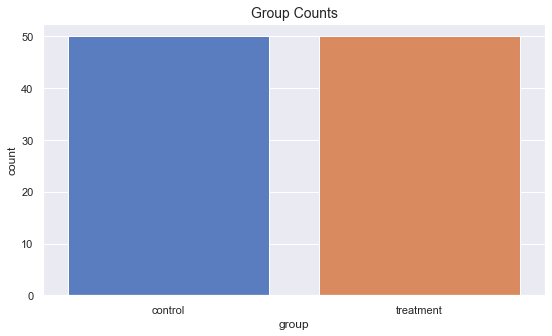

In [15]:
# Count plot
sns.set_palette("muted")
plt.figure(figsize=(9,5))
ax = sns.countplot(x = 'group', data = df)
ax.set_title("Group Counts", fontsize=14);

* The number of users is the same for control and treatment group.

Text(0.5, 1.0, 'Converted Users vs Landing page')

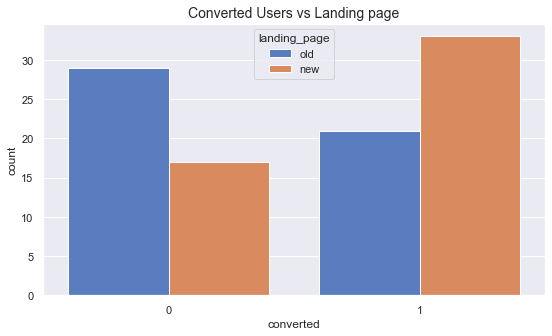

In [16]:
# count plot based on landing page

sns.set_palette("muted")
plt.figure(figsize=(9,5))
ax = sns.countplot(x = 'converted', data = df, hue = 'landing_page')
ax.set_title("Converted Users vs Landing page", fontsize=14)

* More Users who visited the new page were converted.
* While users who were not converted were on the old page.

Text(0.5, 1.0, 'Converted Users vs language_preferred')

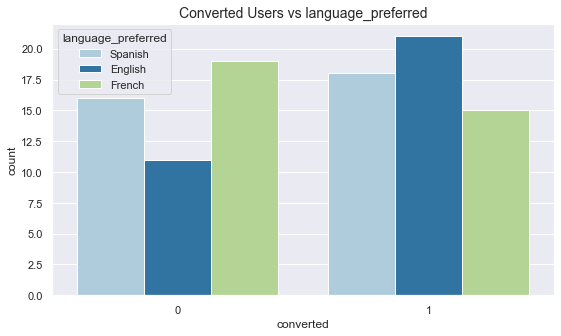

In [17]:
# Count plot to show relationship between the converted and the language preferred

sns.set_palette("Paired")
plt.figure(figsize=(9,5))
ax = sns.countplot(x = 'converted', data = df, hue = 'language_preferred')
ax.set_title("Converted Users vs language_preferred", fontsize=14)

* More Users with English as their preferred language were converted.
* Most Users with French as their language, were not converted. Could it be the new page was not user friendly to French speakers?

Text(0.5, 1.0, 'Landing Page vs Language Preferred')

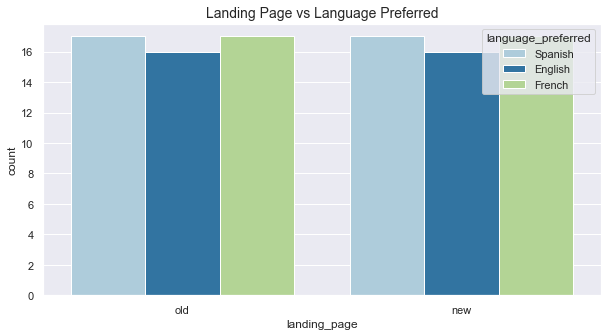

In [18]:
# Count plot to show relationship between the converted and the language preferred

sns.set_palette("Paired")
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'landing_page', data = df, hue = 'language_preferred')
ax.set_title("Landing Page vs Language Preferred", fontsize=14)

* Despite the even distribution of users for both old and new page, we see that Spanish and French having the same number of users who are on the old and new page as well.

In [19]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

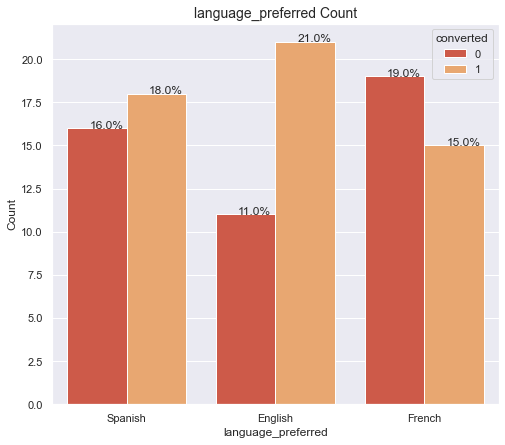

In [20]:
# Plotting language preferred count and converted

plt.figure(figsize=(8,7))
sns.set_palette("RdYlGn")
ax = sns.countplot(df['language_preferred'], hue=df['converted'])
plt.xlabel('language_preferred')
plt.ylabel('Count')
bar_perc(ax,df['language_preferred'])
ax.set_title("language_preferred Count", fontsize=14);

* User with English as their preferred language have the highest conversion.

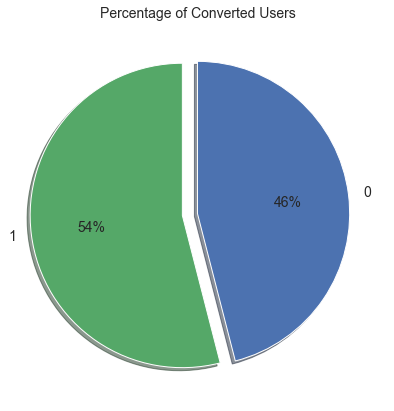

In [21]:
# Plotting percentage of converted user using a pie chart


explosion = [0.1,0] # only "explode" the 1st slice
colors = ['g','b','r'] # set colors for each segment of the pie

plt.figure(figsize=(8,7))
plt.title('Percentage of Converted Users', fontsize=14) # set plot title
Converted_Count = df['converted'].value_counts()
plt.pie(Converted_Count, labels = Converted_Count.index, autopct = '%1.f%%', textprops={'fontsize': 14}, startangle=90, 
        shadow=True, colors=colors, counterclock=True, explode=(explosion))

plt.show()

* The percentage of users who converted is greater than users who did not. 56>46

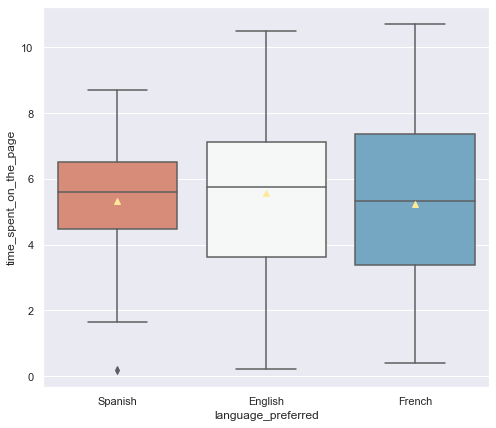

In [22]:
plt.figure(figsize=(8,7))
sns.boxplot(df["language_preferred"],df["time_spent_on_the_page"], palette="RdBu",showmeans=True)
plt.show()

* English has a higher mean compared to Spanish and French.

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Density'>

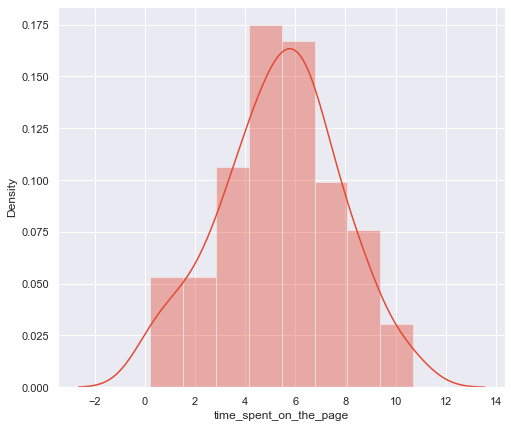

In [23]:
plt.figure(figsize=(8,7))
sns.distplot(df['time_spent_on_the_page'])

* Time spent by users on the different pages is a normal distribution.

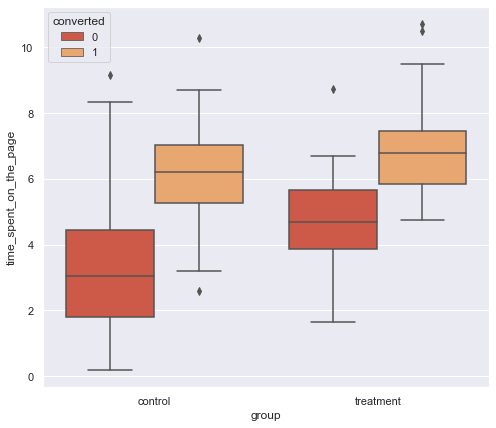

In [25]:
plt.figure(figsize=(8,7))
sns.boxplot(df['group'], df['time_spent_on_the_page'], hue=df['converted']);


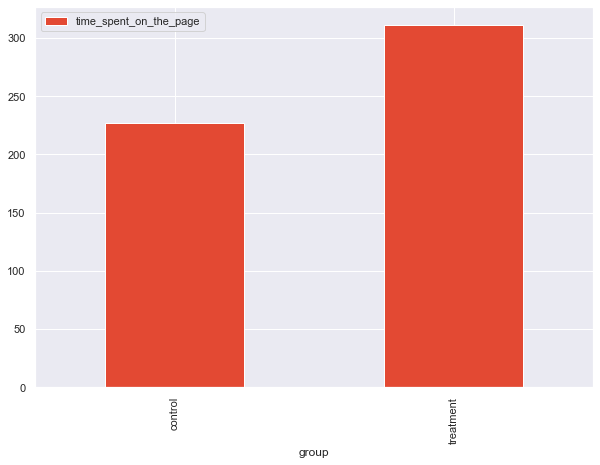

In [26]:
df.groupby(by=['group'])['time_spent_on_the_page'].sum().reset_index().sort_values(['time_spent_on_the_page']).tail(10).plot(x='group',
                                                                                                           y='time_spent_on_the_page',
                                                                                                           kind='bar',
                                                                                                           figsize=(10,7))
plt.show()

* Users in Treatment has the highest time spent on the page.

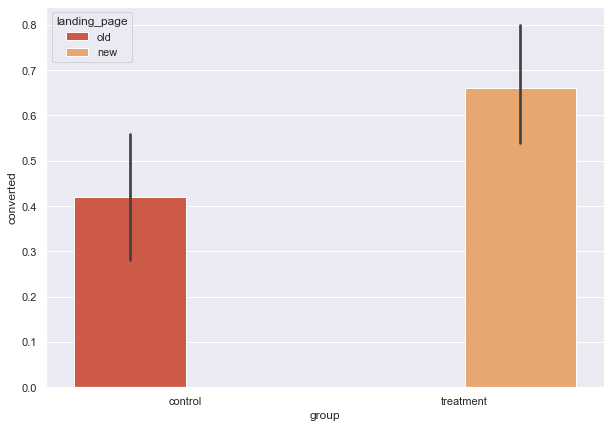

In [27]:
plt.figure(figsize=(10,7))
sns.barplot(data=df,x='group',y='converted',hue='landing_page')
plt.show()

* Users who landed on the new landing page are mostly those from the treatment group.
* They have higher conversion rate as show in the above.

# 2. Do the users spend more time on the new landing page than the old landing page?

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Density'>

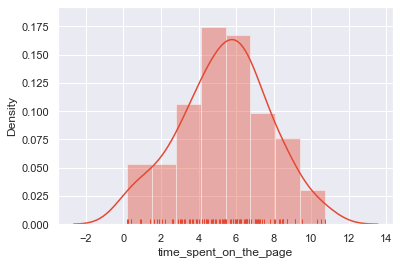

In [28]:
# a density plot of time spent on the page
sns.distplot(df['time_spent_on_the_page'],kde=True,rug=True)

* The time spent on the page by user is normally distributed.

### Let's define the null and alternate hypotheses

Let $\mu$ be the mean time spent on the landing page
>$H_0: \mu = 5.37$

against the alternate hypothesis

> $H_a: \mu > 5.37$

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the delivery time is measured on a continuous scale.

*   Normally distributed population and Sample size < 30 - Yes, it is assumed that the population is normal and the sample size is 25 which is less than 30.
*   Observations are from a simple random sample - Yes, we are informed that the collected sample a simple random sample.
*   Population standard deviation is known - No

From the above we can see T-test is for this problem.

### Let's find the p-value

In [29]:
#import the required functions
from scipy.stats import ttest_1samp

# calculate the test statistic and p-value
test_stat, p_value = ttest_1samp(df['time_spent_on_the_page'], popmean = 5.37, alternative = 'greater')
print('The p-value is ', p_value)
print('The test statistic is ', test_stat)

The p-value is  0.4869507017021549
The test statistic is  0.032798382203392824


# Insight
As the p-value is greater than the level of significance(0.05), we fail to reject the null hypothesis. Hence, the time spent on the new landing page is same as the old landing page.

# 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Text(0.5, 1.0, 'Converted Users vs Landing page')

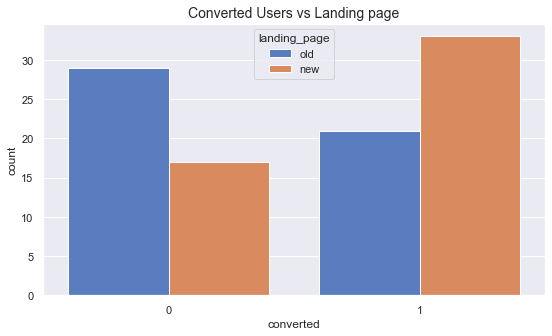

In [30]:
# Showing relationship between converted and landing page

sns.set_palette("muted")
plt.figure(figsize=(9,5))
ax = sns.countplot(x = 'converted', data = df, hue = 'landing_page')
ax.set_title("Converted Users vs Landing page", fontsize=14)

### Let's define the null and alternative hypothesis
Let $p$ be the the proportion of users who visit the landing page and get converted.

The null hypothesis

>$H_0:p \leq 0.5$

against the alternate hypothesis

>$H_a:p > 0.5$

In [31]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest(50, 100, value = 0.5, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.5


# Insight
As the p_value 0.5 is greater than level of significance (0.05), we cannot reject the hypothesis. Hence, there is not enough statistical significance that users converting to the new landing page is greater than that of the old page.

# 4. Does the converted status depend on the preferred language? 

**Let's the relationship of users who are converted and their preferred language.**

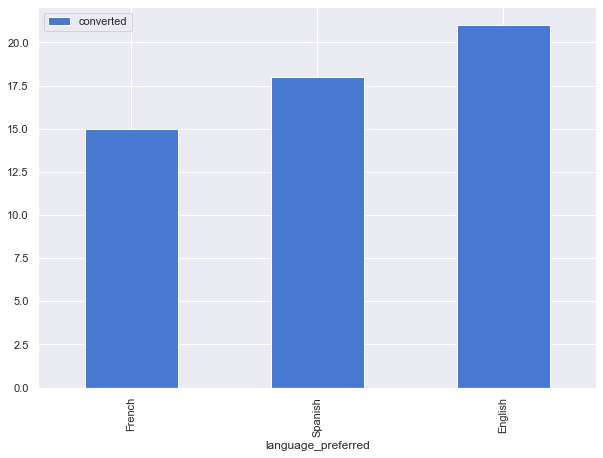

In [32]:
df.groupby(by=['language_preferred'])['converted'].sum().reset_index().sort_values(['converted']).tail(10).plot(x='language_preferred',
                                                                                                           y='converted',
                                                                                                           kind='bar',
                                                                                                           figsize=(10,7))
plt.show()

* Frome the above, users with English as their preferred language are most converted.
* While French has least conversion number.

#### Creating a contigency table using the pandas.crosstab() function

In [33]:
# I would use a random sample by choosing the head and the tail of the dataset.
a = np.array(["no","yes","no","no","yes","no","yes","yes","yes","yes"])
b = np.array(["Spanish","English","Spanish","French","Spanish","Spanish","English","Spanish","Spanish","English"])

In [34]:
df2 = pd.DataFrame({'a': ["no","yes","no","no","yes","no","yes","yes","yes","yes"],
                   'b': ["Spanish","English","Spanish","French","Spanish","Spanish","English","Spanish","Spanish","English"]})

In [35]:
pd.crosstab(index=df2["a"], columns=df2["b"], margins=True)

b,English,French,Spanish,All
a,,,,
no,0,1,3,4
yes,3,0,3,6
All,3,1,6,10


# Observations:
* 3 users converted because Spanish is a preferred language and 3 users did not convert
* 3 users converted because of English as a language_preferred
* 1 user did not convert and no user converted because of French language

6 users converted while 4 did not due to language preference. We can say users convert based on their language preference.

# 5. Is the mean time spent on the new page same for the different language users?

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

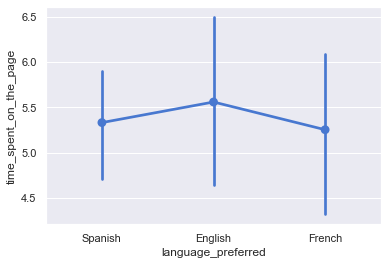

In [36]:
# Showing the relationship between time spent on the new page and language preferred
sns.pointplot(df['language_preferred'],df['time_spent_on_the_page'])

* More users with English as their preferred language spent more time on the new page.

### Let's define the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of the preferred languages Spanish, English and French.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one preferred language is different from the rest.

language_preferred
English    5.559063
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


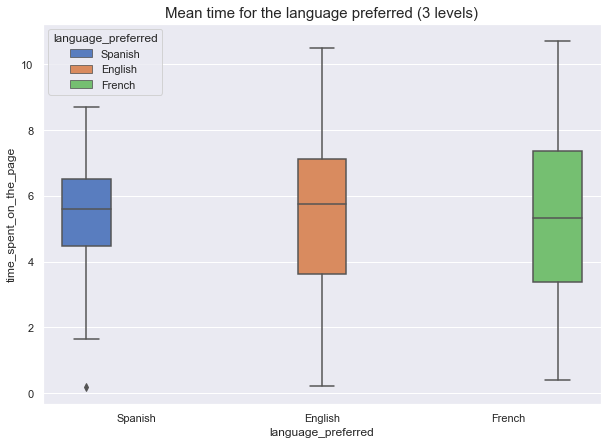

In [37]:
# mean time for the preferred languages
print(df.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (10,7))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df, hue = 'language_preferred')
a.set_title("Mean time for the language preferred (3 levels)", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Language Preferred follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Language Preferred does not follow a normal distribution

In [38]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


* Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: The variance for all 3 preferred lanaguages are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [39]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df['time_spent_on_the_page'][df['language_preferred']=="Spanish"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="French"], 
                                   df['time_spent_on_the_page'][df['language_preferred']=="English"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


* Since the p-value is greater than level of significance (0.05), we fail to reject the null hypothesis of homogeneity of variances.
* The 3 languages have equal variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Let's find the p-value

In [40]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


### Insight
As the p-value is much greater than the significance level, we fail to reject the null hypothesis. Thus, having enough statistical significance to conclude that at least the mean of one preferred language is different from the rest at 5% significance level.

# Conclusion 
Due to the p-values being greater we will fail to reject the null and conclude the following:

- The time spent on the new landing page is same as the old landing page.
- There is not enough statistical significance that users converting to the new landing page is greater than that of the old page.
- More users convert based on their language preference.
- There is enough statistical significance to conclude that at least the mean of one preferred language is different from the rest at 5% significance level.

# Recommendation
- At the end of every session a user logs in, a feedback form should be display to get the experience of the user.
- Feedbacks are collated and it becomes visible what can be done the users like and don't like.
- Improving the interface of the new page to make it user friendly for Spanish and English user. They have the lowest conversion rate.